# Problem Statement
#Taking into consideration of all the raw materials(Features) perdict the best accuracy of strength of the material by using Machine Learning Model.

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Default Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Maths Libraries
import scipy.stats as sci

#Data Pre-Processing libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

#Machine Learning Libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
import xgboost
from xgboost import XGBRegressor

#Metrics Libraries
from sklearn.metrics import r2_score,mean_squared_error

#Clustering Libraries
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('Capstone Project.xlsx')

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [6]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### Analysis
- As each column has a count of 1030, this dataset does not have any missing values
- The Difference between mean and median is high, so there is a chance of outliers in the data.
- As the maximum age is 365, the data seems to be yearly data.

# Building a custom summary function for EDA Report

In [7]:
def describe(my_df):
    
    cols = []
    for i in my_df.columns:
        if my_df[i].dtype != object:
            cols.append(i)
    
    result = pd.DataFrame(columns = cols, index = ['DataType','Count','Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std','Skew','Kurt','Range','IQR','Skewness comment','Outlier comment','Kurtosis comment'])
    
    for i in result.columns:
        result.loc['DataType',i] = my_df[i].dtype
        result.loc['Count',i] = my_df[i].count()
        result.loc['Min',i] = my_df[i].min()
        result.loc['Q1',i] = my_df[i].quantile(0.25)
        result.loc['Q2',i] = my_df[i].quantile(0.5)
        result.loc['Mean',i] = round(my_df[i].mean(),2)
        result.loc['Q3',i] = my_df[i].quantile(0.75)
        result.loc['Max',i] = my_df[i].max()
        result.loc['Std',i] = round(my_df[i].std(),2)
        result.loc['Skew',i] = round(my_df[i].skew(),2)
        result.loc['Kurt',i] = round(my_df[i].kurt(),2)
        result.loc['Range',i] = my_df[i].max() - my_df[i].min()
        result.loc['IQR',i] = my_df[i].quantile(0.75) - my_df[i].quantile(0.25)
        
        #Adding comments for skewness
        if result.loc['Skew',i] <= -1:
            sk_label = "Highly negatively skewed"
        elif -1 < result.loc['Skew',i] <= -0.5:
            sk_label = "Moderately negatively skewed"
        elif -0.5 < result.loc['Skew',i] < 0:
            sk_label = "Approx normal distribution(-ve)"
        elif 0 <= result.loc['Skew',i] < 0.5:
            sk_label = "Approx normal distribution(+ve)"
        elif 0.5 <= result.loc['Skew',i] < 1:
            sk_label = "Moderately positively skewed"
        elif result.loc['Skew',i] >= 1:
            sk_label = "Highly positively skewed"
        else:
            sk_label = 'Error'
        result.loc['Skewness comment', i] = sk_label
        
        # Adding comments for outliers
        upperlimit = result.loc['Q3',i] + (1.5 * result.loc['IQR',i])
        lowerlimit = result.loc['Q1',i] - (1.5 * result.loc['IQR',i])
    
        if len([x for x in my_df[i] if x < lowerlimit or x > upperlimit]) > 0:
            outlier_label = "Have outliers"
        else:
            outlier_label = "No outliers"
        result.loc['Outlier comment', i] = outlier_label
        
        # Adding kurtosis comment
        if result.loc['Kurt',i] <= -1:
            kt_label = "Highly platykurtic curve"
        elif -1 < result.loc['Kurt',i] <= -0.5:
            kt_label = "Moderately platykurtic curve"
        elif -0.5 < result.loc['Kurt',i] < 0.5:
            kt_label = "Mezokurtic curve"
        elif 0.5 <= result.loc['Kurt',i] < 1:
            kt_label = "Moderately leptokurtic curve"
        elif result.loc['Kurt',i] >= 1:
            kt_label = "Highly leptokurtic curve"
        else:
            kt_label = 'Error'
        result.loc['Kurtosis comment', i] = kt_label
    display(result)


In [8]:
describe(df)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
DataType,float64,float64,float64,float64,float64,float64,float64,int64,float64
Count,1030,1030,1030,1030,1030,1030,1030,1030,1030
Min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1,2.33
Q1,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.71
Q2,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.445
Mean,281.17,73.9,54.19,181.57,6.2,972.92,773.58,45.66,35.82
Q3,350.0,142.95,118.3,192.0,10.2,1029.4,824.0,56.0,46.135
Max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365,82.6
Std,104.51,86.28,64.0,21.35,5.97,77.75,80.18,63.17,16.71
Skew,0.51,0.8,0.54,0.07,0.91,-0.04,-0.25,3.27,0.42


## Analysis 2
- Age is highly positively Skewed
- There are too many columns which consists of outliers (Outlier treatment should be made)

## Performing Outlier Treatment

In [9]:
def replace_outlier(df,col, method = 'Quartile',strategy = 'Median'):
    col_data = df[col]

    
    #Using Quartile to set the values
    if method == 'Quartile':
        Q2 = df[col].quantile(0.5)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        Lower_limit = Q1 - 1.5 * IQR
        Upper_limit = Q3 + 1.5 * IQR
        
        
    # USing Standard deviation to set the values
    elif method == 'Standard Deviation':
        mean = df[col].mean()
        std = df[col].std()
        
        low_limit = mean - 2*std
        up_limit = mean + 2*std
        
    else:
        print('Pass the Correct Method')
        
        
    #Printing all the outliers
    
    outliers = df.loc[(col_data < Lower_limit)|(col_data > Upper_limit),col]
    outlier_density = round(len(outliers)/len(df),2)
    
    if len(outliers) == 0:
        print(f'Feature {col} does not have any outliers')
        print('\n')
    else:
        print(f'Feature {col} have outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'Outlier percentage in {col} is {outlier_density}')
        print('\n')
        display(df[(col_data < Lower_limit) | (col_data > Upper_limit)])
        print('\n')
    
    
# Replacing the outliers
    if strategy=='Median':
        df.loc[(col_data<Lower_limit)|(col_data>Upper_limit),col]=Q2
        
    elif strategy=='Mean':
            df.loc[(col_data<Lower_limit)|(col_data>Upper_limit),col]=mean
    else:
        print("pass the correct strategy")
        
    return df

# ODT (outlier detecrtion)

In [10]:
def odt_plots(df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))
    
    # Descriptive statistics Box plot
    sns.boxplot(df[col],ax=ax1)
    ax1.set_title(col+''+'BoxPlot')
    ax1.set_xlabel('Boxplot')
    ax1.set_ylabel('Values')
    
    
    # Plotting Histogram with outliers
    sns.distplot(df[col],ax=ax2,fit=sci.norm)
    ax2.axvline(df[col].mean(),color= 'green')
    ax2.axvline(df[col].median(),color= 'red')
    ax2.set_title(col+''+'Histogram')
    ax2.set_xlabel('Density')
    ax2.set_ylabel('Values')
    
    
    #Plotting without outliers
    df_out = replace_outlier(df,col)
    
    sns.distplot(df_out[col],ax=ax3,fit=sci.norm)
    ax3.axvline(df_out[col].mean(),color= 'green')
    ax3.axvline(df_out[col].median(),color= 'red')
    ax3.set_title(col+''+'Histogram without outliers')
    ax3.set_xlabel('Density')
    ax3.set_ylabel('Values')
    
    plt.show()

In [11]:
#odt contains 3 plots
# 1. First plot is descriptive statistics or box plot
# 2. Second is histogram with outliers
# 3. Third is histogram without outliers

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Feature cement does not have any outliers




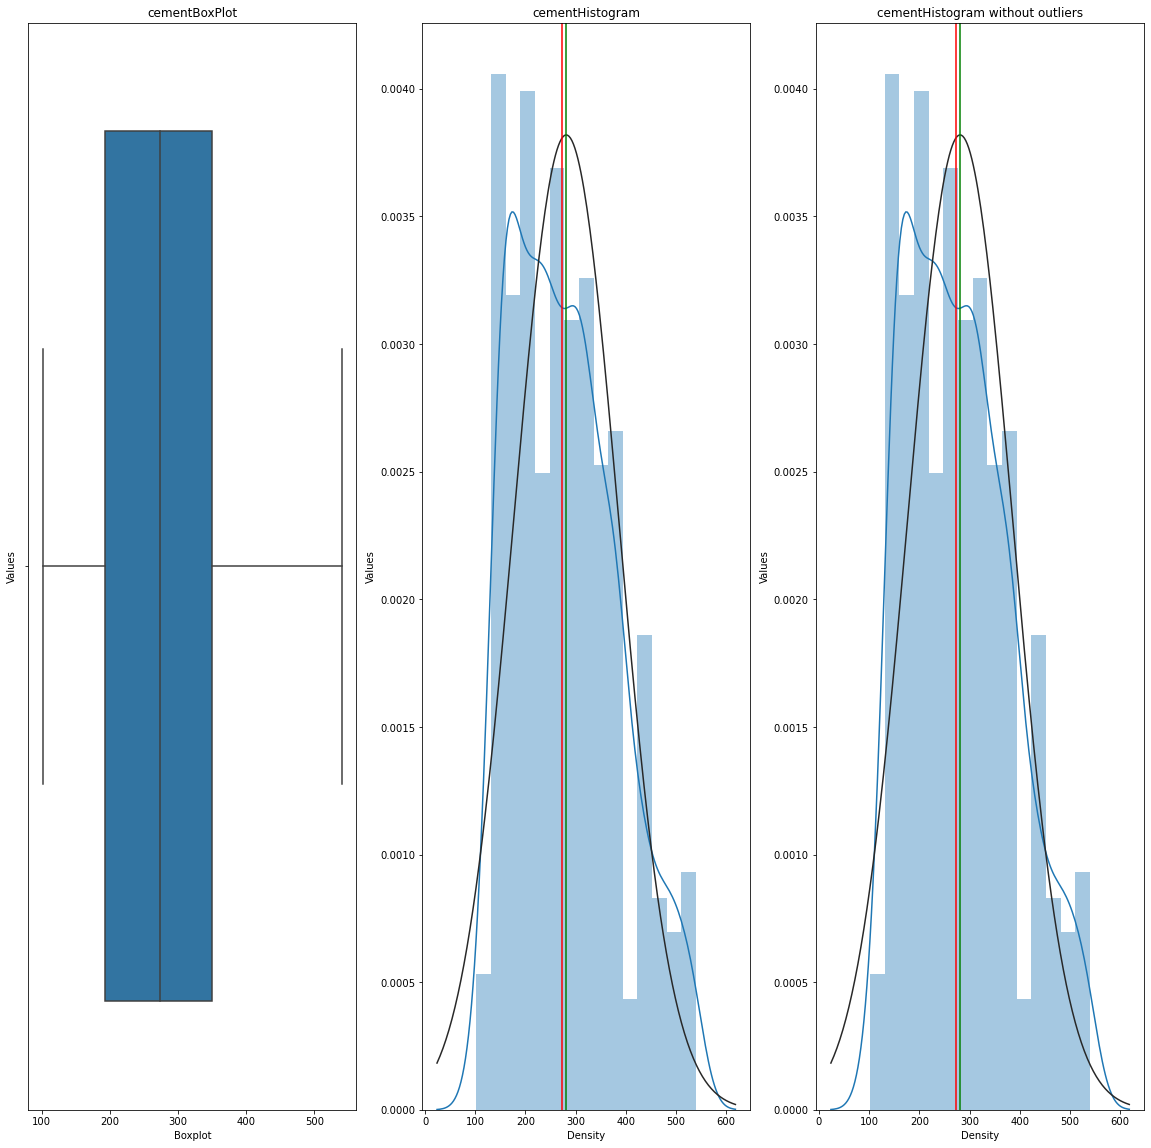

Feature slag have outliers


Total number of outliers in slag are 2


Outlier percentage in slag is 0.0




C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


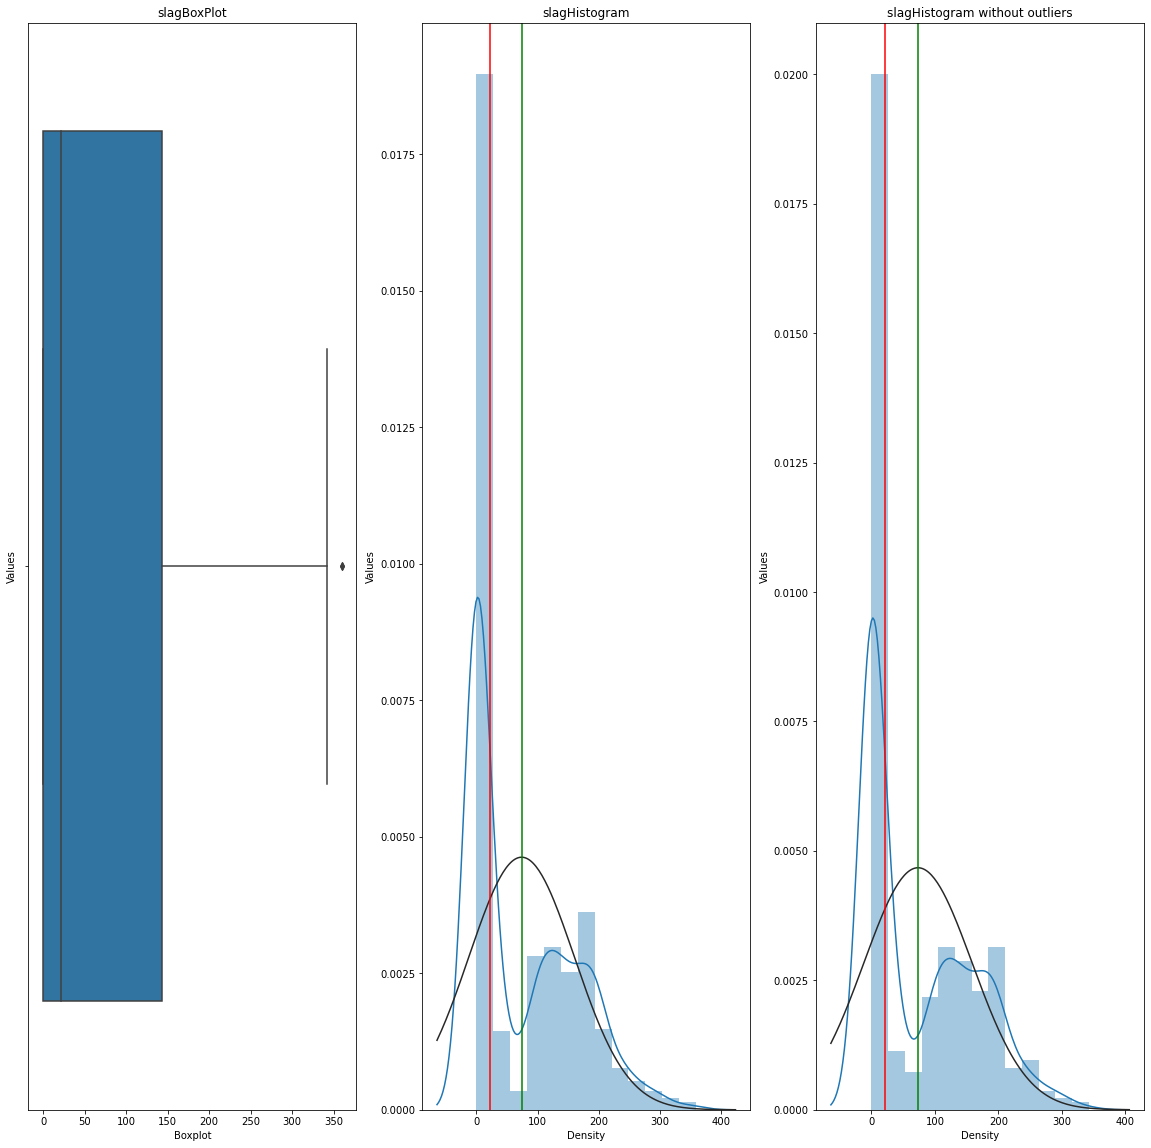

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Feature ash does not have any outliers




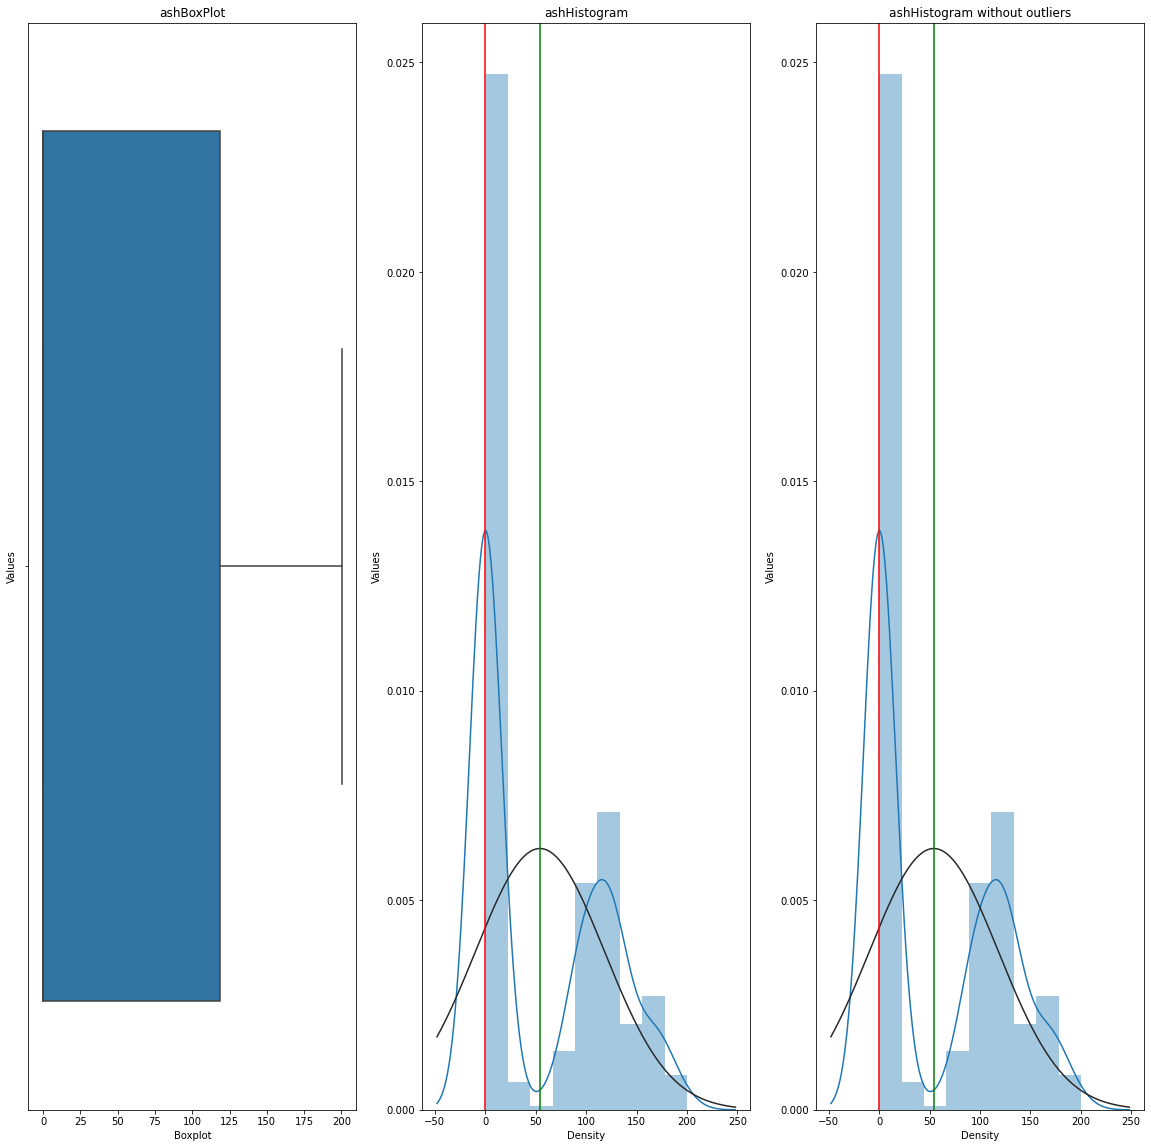

Feature water have outliers


Total number of outliers in water are 9


Outlier percentage in water is 0.01




C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
740,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
826,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


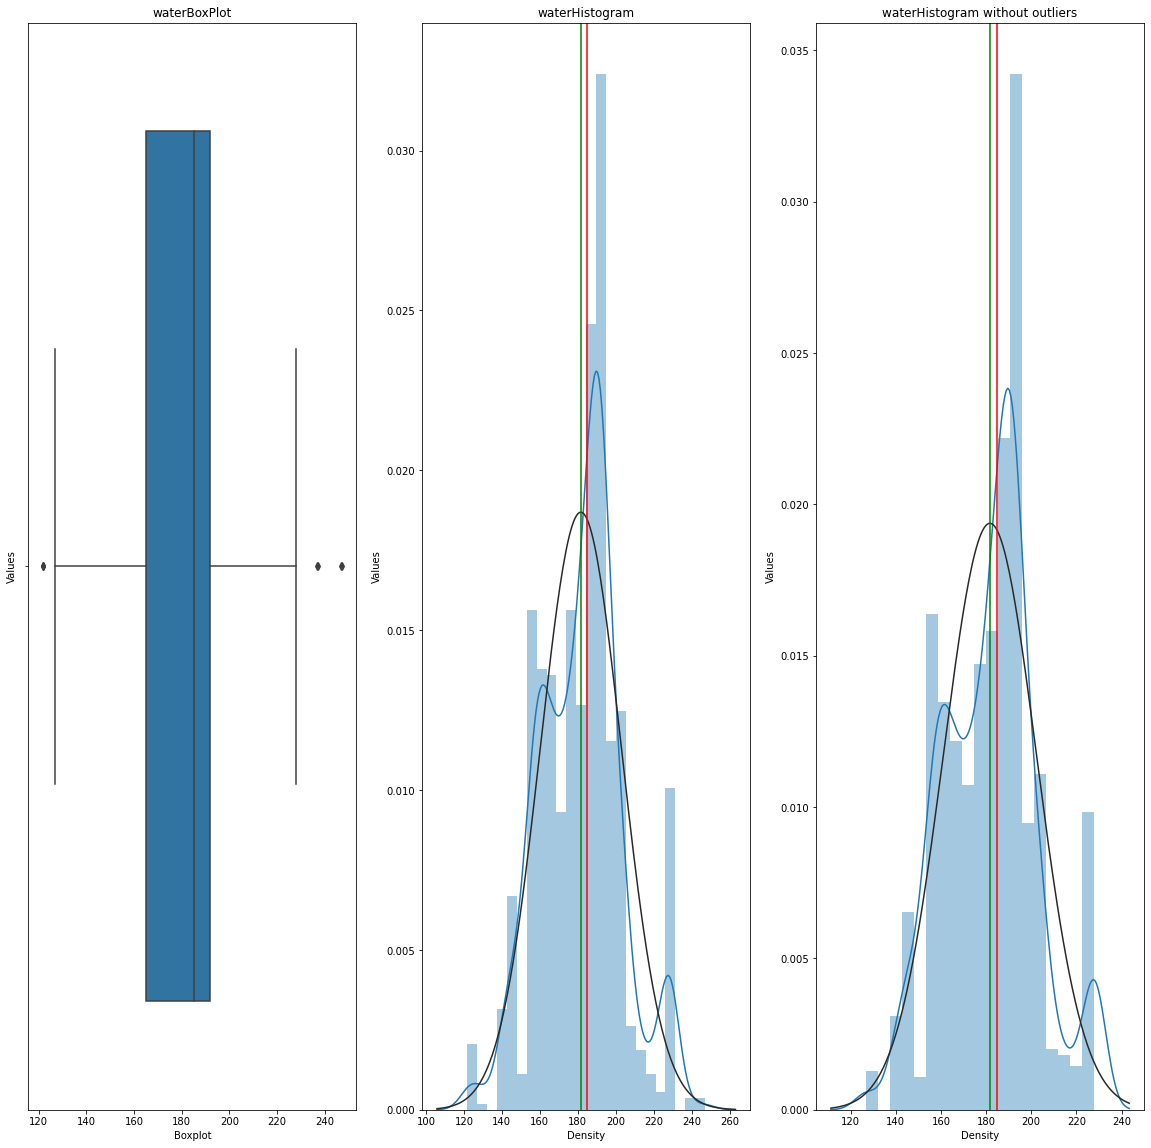

Feature superplastic have outliers


Total number of outliers in superplastic are 10


Outlier percentage in superplastic is 0.01




C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


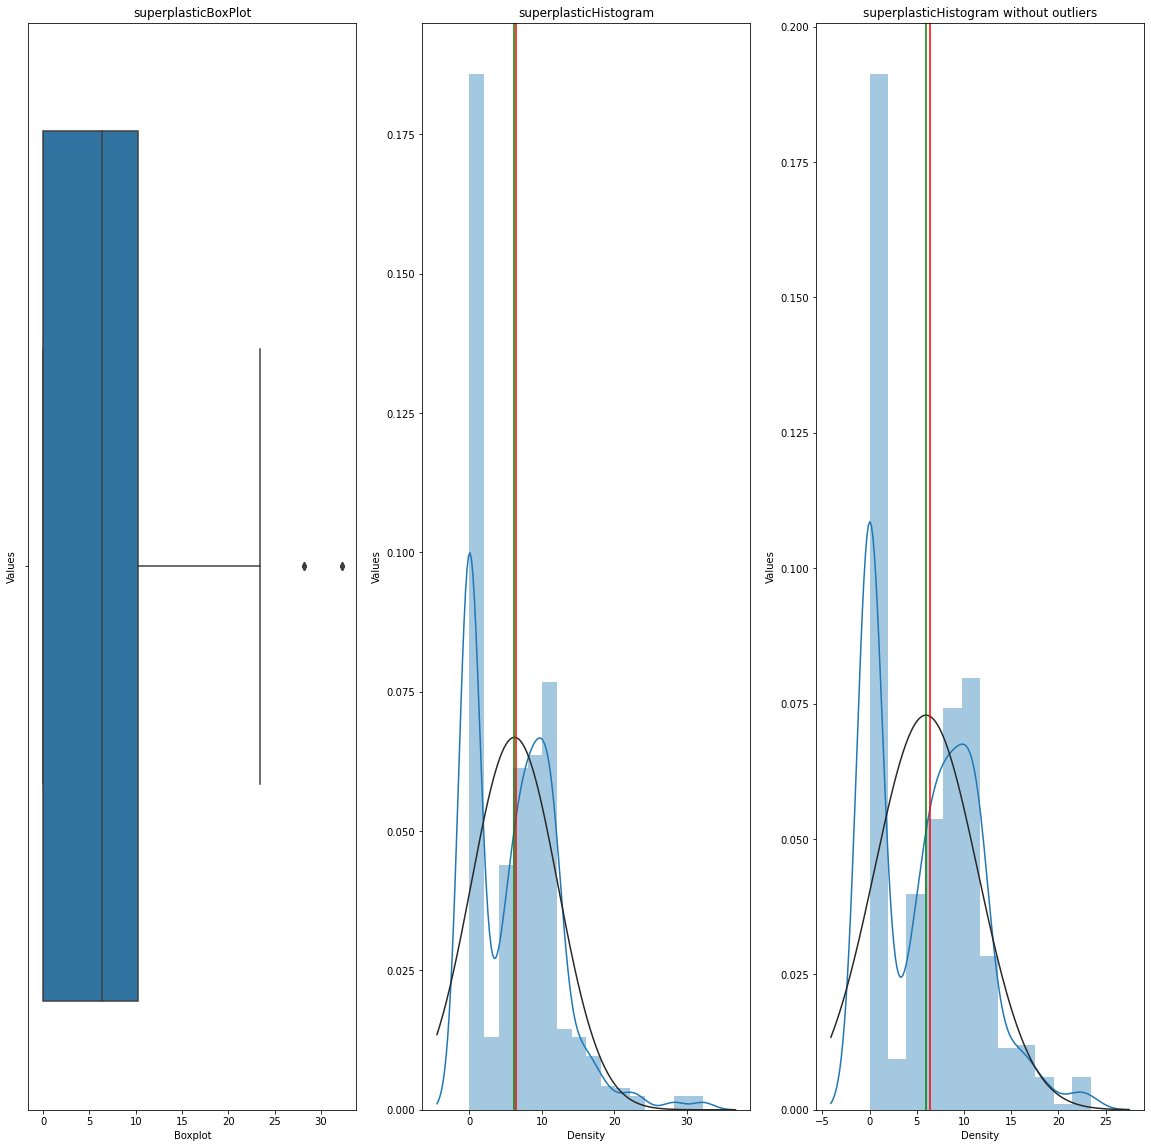

C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Feature coarseagg does not have any outliers




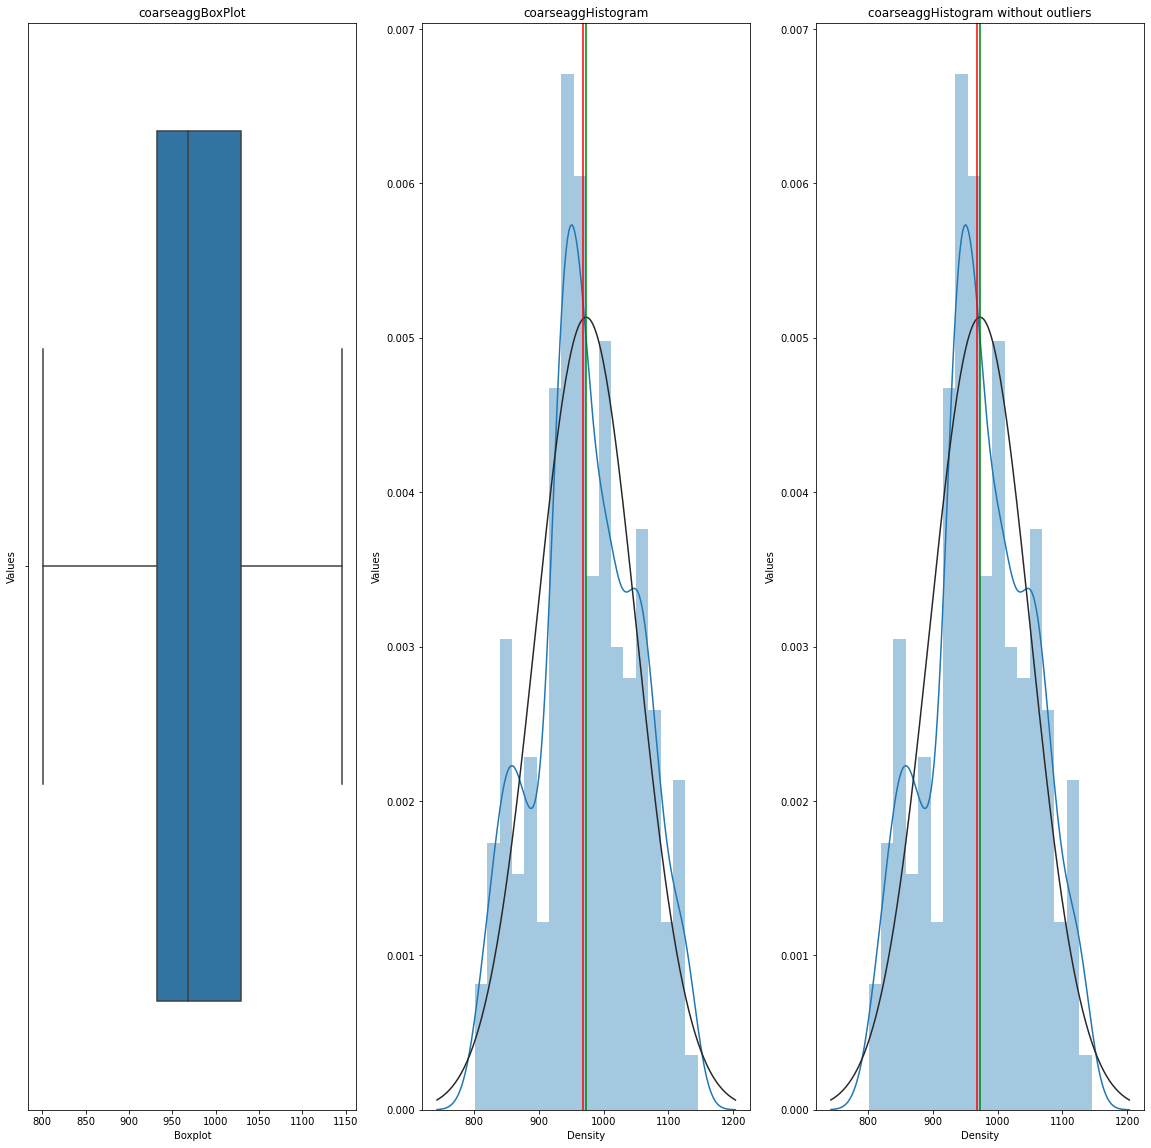

Feature fineagg have outliers


Total number of outliers in fineagg are 5


Outlier percentage in fineagg is 0.0




C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


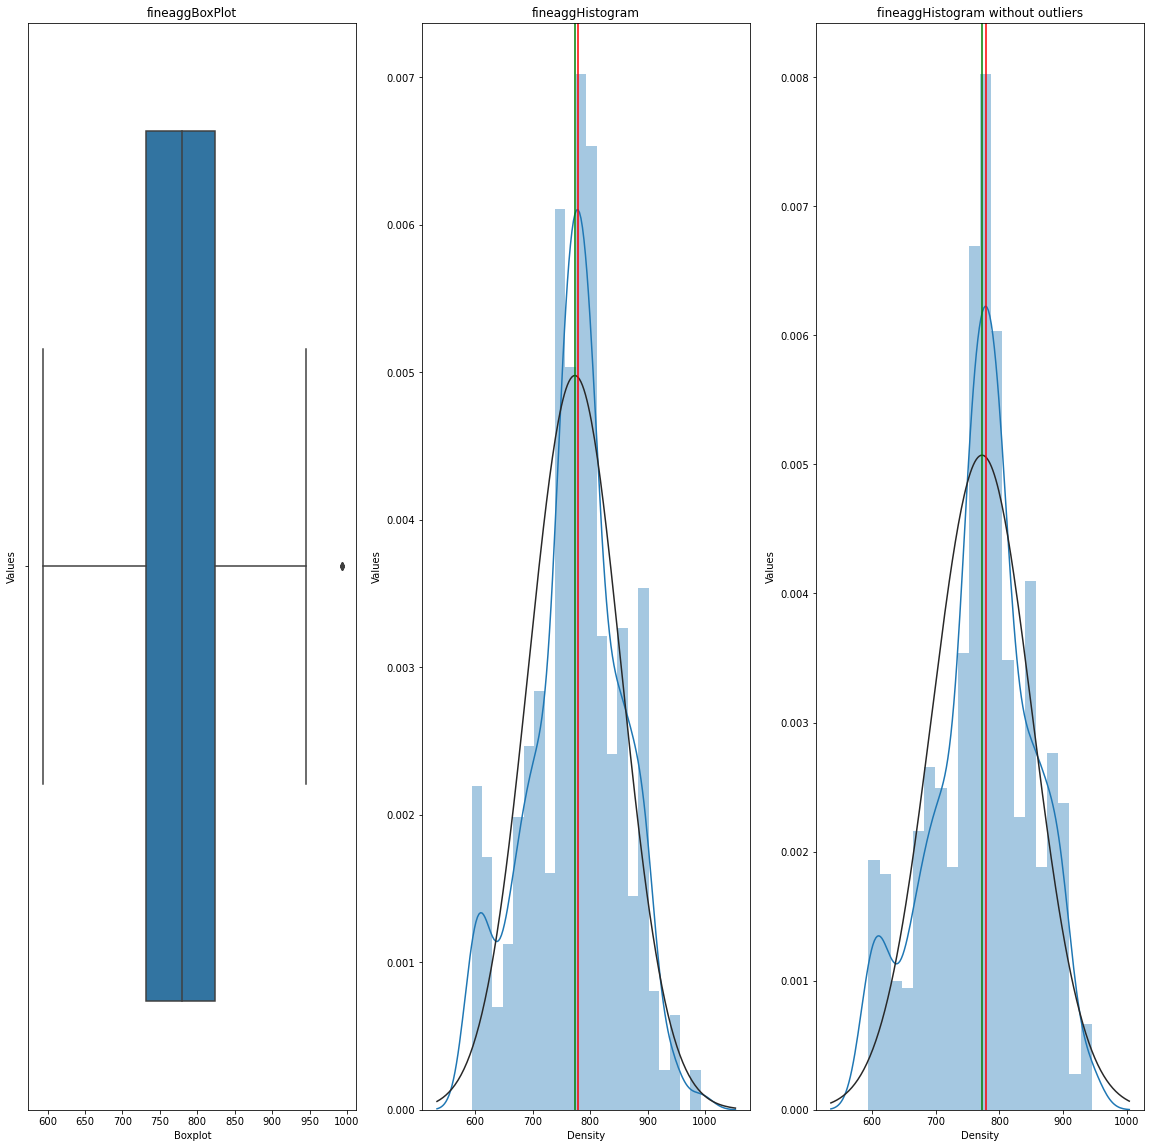

Feature age have outliers


Total number of outliers in age are 59


Outlier percentage in age is 0.06




C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


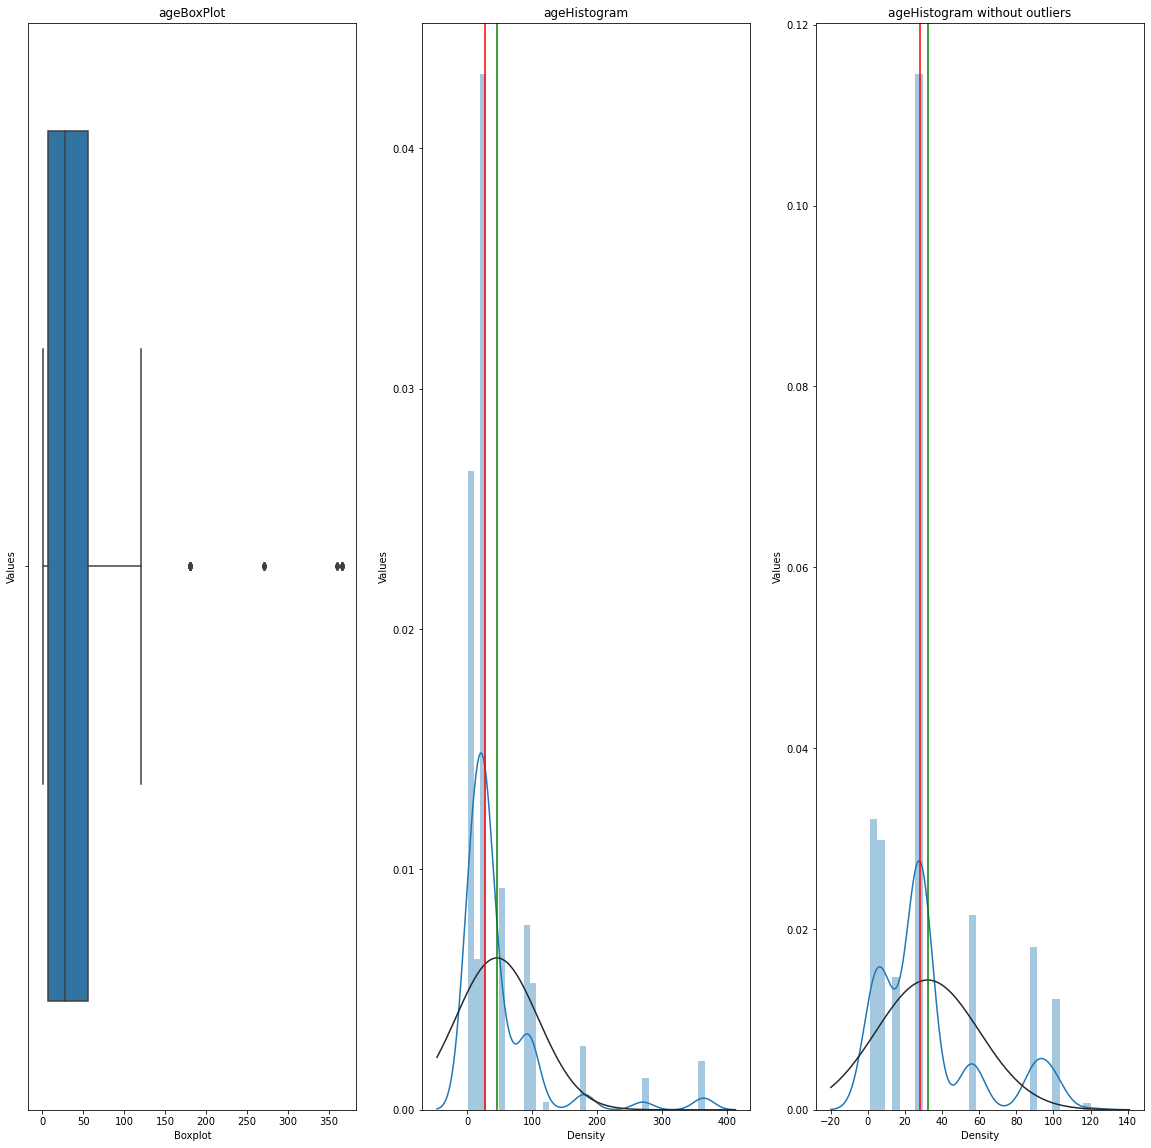

Feature strength have outliers


Total number of outliers in strength are 4


Outlier percentage in strength is 0.0




C:\Users\ashish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
192,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.75
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
950,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.60
1003,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.20


C:\Users\ashish\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


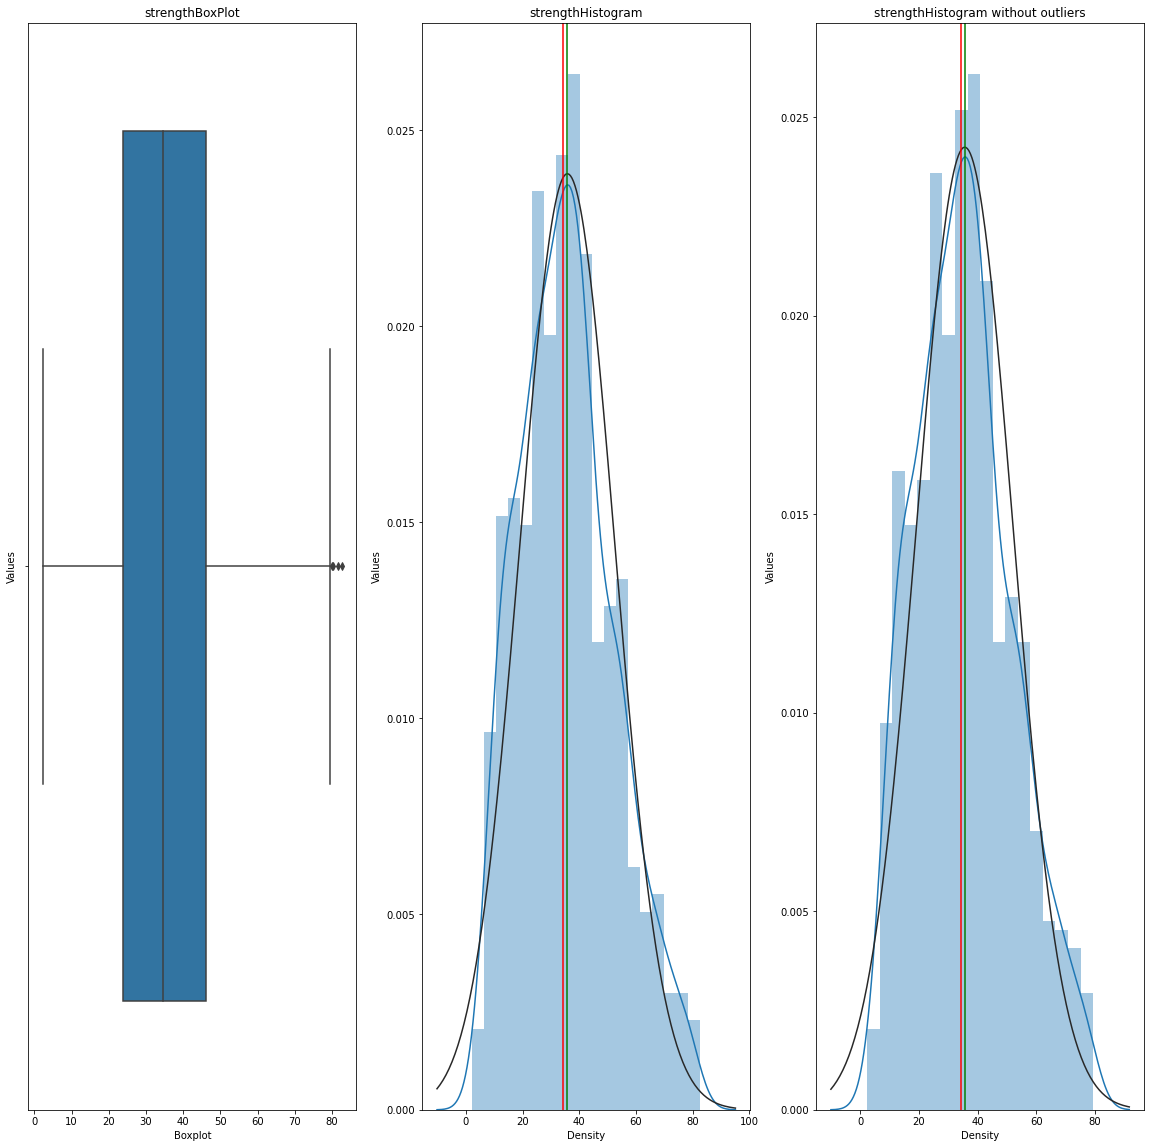

In [12]:
for col in df.columns:
    odt_plots(df,col)

# Multivariate analysis using regression

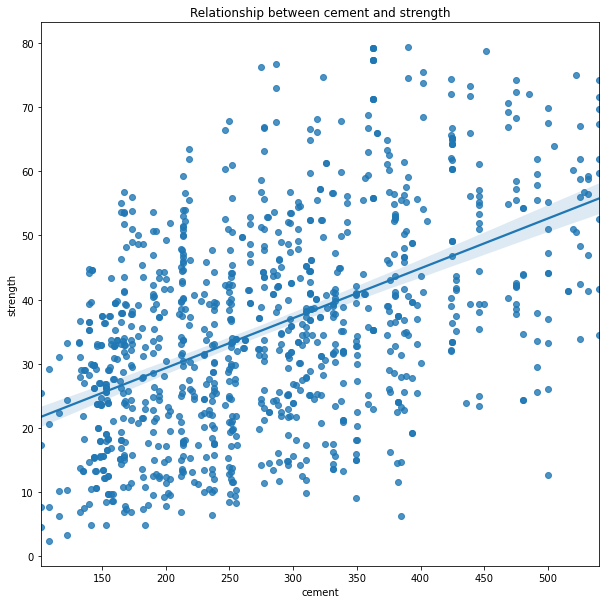

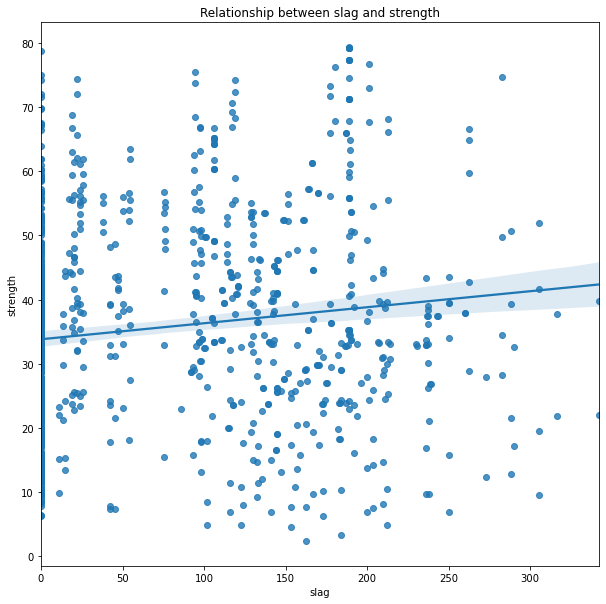

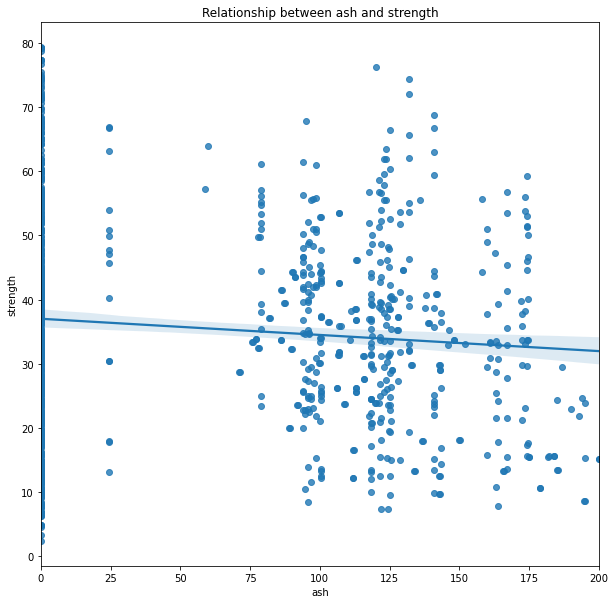

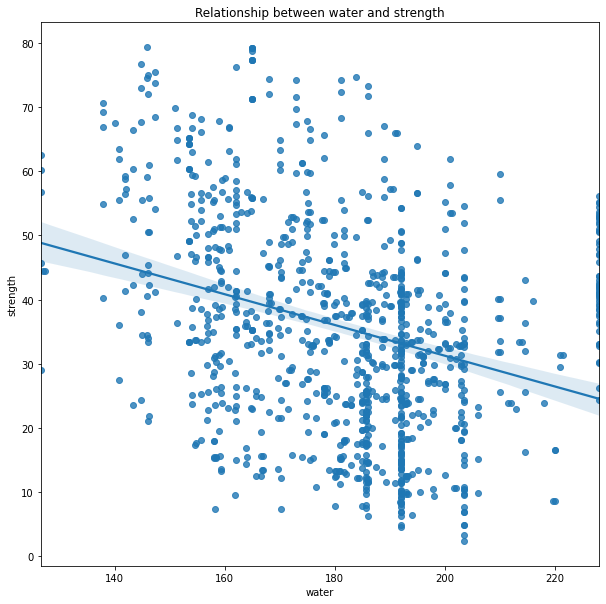

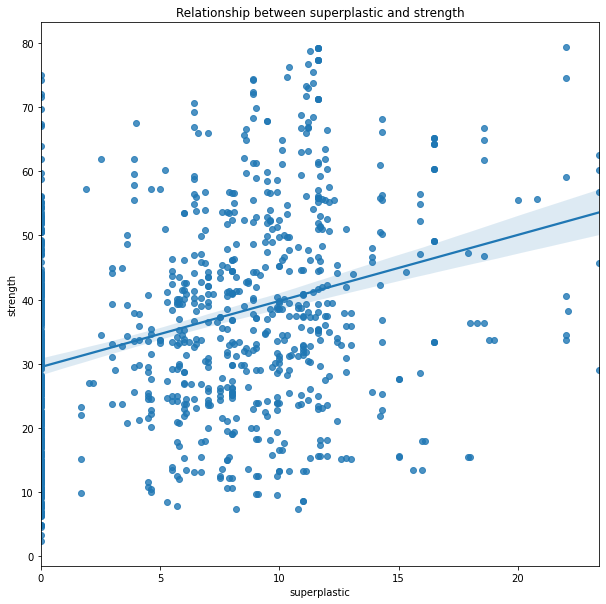

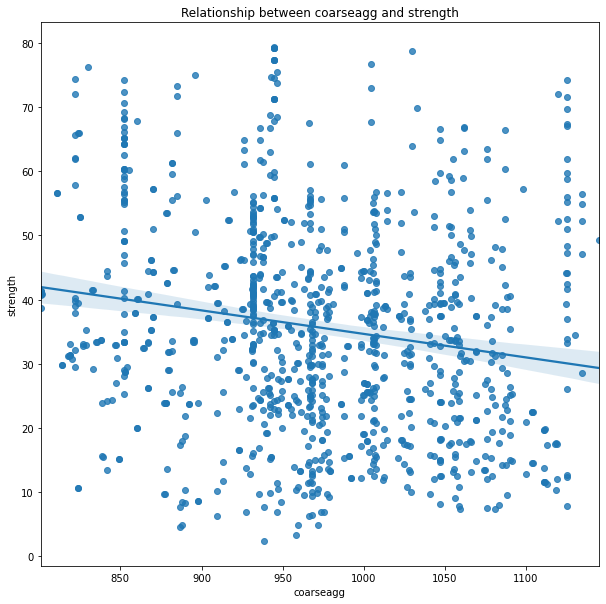

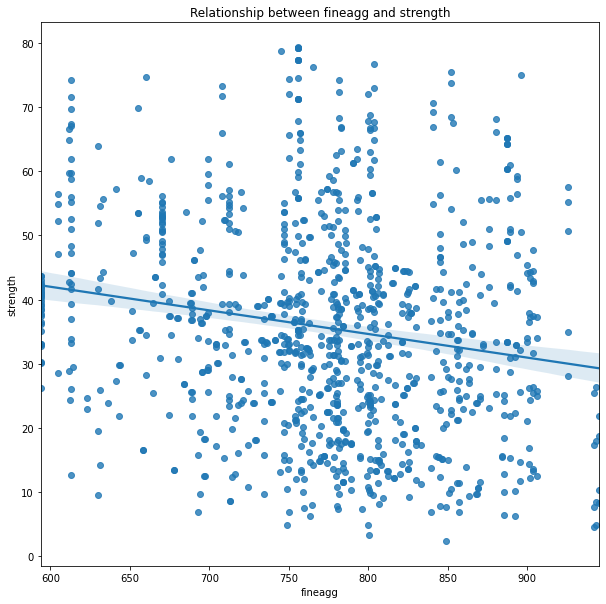

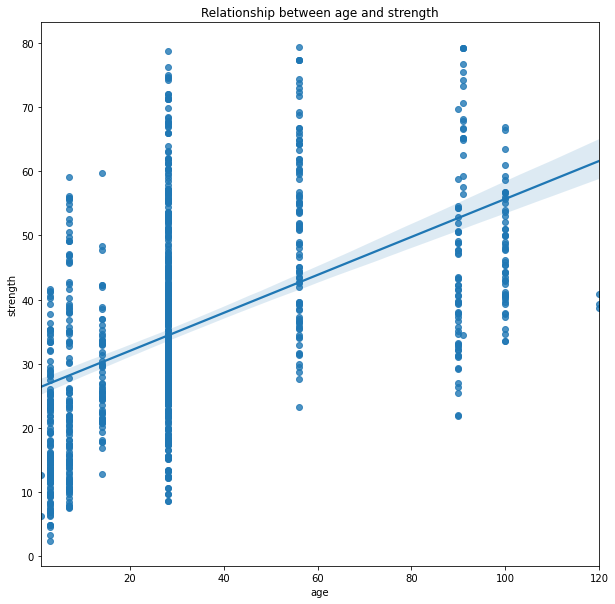

In [13]:
for col in df.columns:
    if col!='strength':
        fig,ax1=plt.subplots(figsize=(10,10))
        sns.regplot(x=df[col],y=df['strength'],ax=ax1).set_title(f'Relationship between {col} and strength')

### Analysis
- Negative Corelation between ash and strength, water and strength, coresagg and strength,fineagg and strength

- Cement and strength are highly postively corelated
- Slag and strength are slightly postively corelated
- Ash and strength are slightly negatively corelated
- Water and strength are highly negatively corelated
- Superplastic and strength are highly positively corelated
- Coresagg and strength are slightly negatively corelated
- Fineagg and strength are highly negatively corelated
- Age and strenght are highly postively corelated

# Checking multicolinearity Stage 1

In [14]:
corr = df.corr()

<AxesSubplot:>

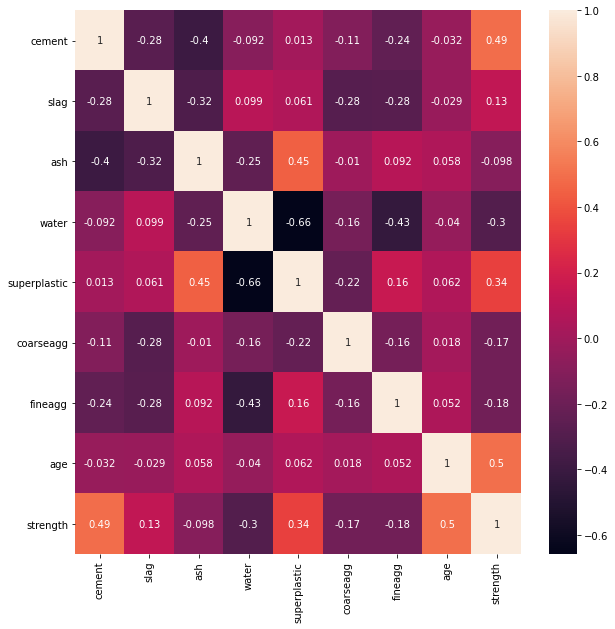

In [15]:
f,ax = plt.subplots(figsize= (10,10))
sns.heatmap(corr,annot=True)

- ash and cement = -0.4
- ash and slag = -0.32
- superplastic and ash = 45
- finagg and water = -0.30


# add more from the script

In [16]:
# another method to findout multicolinearity is VIF (Variance inflation factor or Index)
#VIF = 1/(1-r2)
# if VIF > 5 then we say that multicolinearity exists

In [17]:
#Steps :
#1. Regress every independent variable with each other and find the r2
#2. Findout the vif using the above formulae

In [18]:
def vif(features):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['vif_factor'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    vif['features']=features.columns
    
    return vif.sort_values('vif_factor')

In [19]:
vif(df.drop('strength',axis=1))

,vif_factor,features
7,2.368372,age
1,3.342314,slag
2,4.415840,ash
4,5.724145,superplastic
0,14.291158,cement
6,68.664404,fineagg
3,81.963087,water
5,86.938582,coarseagg


# Co-relation percentage with the target

In [20]:
def corr_with_target(df,t_col):
    independent_variables = df.drop(t_col,axis=1).columns
    corr_result=[]
    for col in independent_variables:
        corr_result.append(df[t_col].corr(df[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['Independent variables','Correlation']).T
    return result.sort_values('Correlation')

In [21]:
corr_with_target(df,'strength')

,Independent variables,Correlation
3,water,-0.300043
6,fineagg,-0.176113
5,coarseagg,-0.173234
2,ash,-0.097973
1,slag,0.129561
4,superplastic,0.342633
0,cement,0.493518
7,age,0.499711


- Age and cement is having are having 49
- SuperPlastic 34
- water -30

#### APPLYING PCA TO RUN MULTICOLINEARITY

In [22]:
def Pca(x):
    
    n_com =len(x.columns)
    
    # applying standard scaler
    from sklearn.preprocessing import StandardScaler
    x= StandardScaler().fit_transform(x)
    
    #applying PCA
    from sklearn.decomposition import PCA
    
    for i in range(1,n_com):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(x)
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            n_components=i
            break
            
    
    print('Explained Variance Ratio after PCA is',evr)
    
    #creating a  dataframe
    
    col=[]
    for j in range(1,n_components+1):
        col.append('pc_'+str(j))
    
    pca_df = pd.DataFrame(p_comp,columns=col)
    return pca_df

In [23]:
transform_df = Pca(df.drop('strength',axis = 1))

Explained Variance Ratio after PCA is [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [24]:
transform_df.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228


In [25]:
transform_df = transform_df.join(df['strength'],how='left')

In [26]:
transform_df.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29


### Model Building(Normal Model Building)

In [27]:
# 1. Normal Model
# Train and test split

def train_and_test_split(df,t_col,testsize=0.3):
    x = df.drop(t_col,axis=1)
    y = df[t_col]
    return train_test_split(x,y,test_size=testsize,random_state=0)

In [28]:
# Model Building Function

def build_model(model_name,estimator,df,t_col):
    x_train,x_test,y_train,y_test = train_and_test_split(df,t_col)
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2score= r2_score(y_test,y_pred)
    temp = [model_name,rmse,r2score]
    return temp

In [29]:
build_model('LinearRegression',LinearRegression(),transform_df,'strength')

['LinearRegression', 9.268894457764832, 0.6733375978100167]

# Building multiple models

In [30]:
def multiple_models(df,t_col):
    col_names = ['Model_Name','RMSC','R2_score']
    result = pd.DataFrame(columns=col_names)
    result.loc[len(result)] = build_model('LinearRegression',LinearRegression(),df,t_col)
    result.loc[len(result)] = build_model('SVR',SVR(),df,t_col)
    result.loc[len(result)] = build_model('Lasso',Lasso(),df,t_col)
    result.loc[len(result)] = build_model('Ridge',Ridge(),df,t_col)
    result.loc[len(result)] = build_model('Decision Tree',DecisionTreeRegressor(),df,t_col)
    result.loc[len(result)] = build_model('XG_boost',XGBRegressor(),df,t_col)
    result.loc[len(result)] = build_model('ADA_boost',AdaBoostRegressor(),df,t_col)
    result.loc[len(result)] = build_model('Random_forest',RandomForestRegressor(),df,t_col)
    result.loc[len(result)] = build_model('Gradient_boosting',GradientBoostingRegressor(),df,t_col)
    result.loc[len(result)] = build_model('KNN_Regressor',KNeighborsRegressor(),df,t_col)
    return result

In [31]:
multiple_models(transform_df,'strength')

,Model_Name,RMSC,R2_score
0,LinearRegression,9.268894,0.673338
1,SVR,9.051841,0.688458
2,Lasso,9.635047,0.647019
3,Ridge,9.270519,0.673223
4,Decision Tree,7.888288,0.763403
5,XG_boost,5.776115,0.873143
6,ADA_boost,8.591440,0.719343
7,Random_forest,6.108069,0.858143
8,Gradient_boosting,6.644058,0.832154
9,KNN_Regressor,7.810643,0.768038


In [32]:
# Cross Validation

def k_fold_cv(x,y,fold=10):
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    score_lasso = cross_val_score(Lasso(),x,y,cv=fold)
    score_Ridge = cross_val_score(Ridge(),x,y,cv=fold)
    score_DT = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_Xgboost = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_Ada = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_RM = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    
    
    model_names=['LinearRegression','SVR','Lasso','Ridge','DecisionTree','XGBoost','ADA','RandomForest','Gradient_boost','K_Neighbours']
    score = [score_lr,score_svr,score_lasso,score_Ridge,score_DT,score_Xgboost,score_Ada,score_RM,score_GB,score_KNN]
    
    result = []
    
    for i in range(0,len(model_names)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_std]
        result.append(temp)
    
    
    Kfold_df = pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return Kfold_df

In [33]:
k_fold_cv(transform_df.drop('strength',axis=1),transform_df['strength'])

,model_names,score_mean,score_std
0,LinearRegression,0.663928,0.059476
1,SVR,0.703117,0.042765
2,Lasso,0.649837,0.049887
3,Ridge,0.663935,0.059437
4,DecisionTree,0.762769,0.059180
5,XGBoost,0.873262,0.036061
6,ADA,0.729202,0.036364
7,RandomForest,0.865960,0.033784
8,Gradient_boost,0.828732,0.050105
9,K_Neighbours,0.767952,0.055853


#### Hyperparameter Tuning Models

In [34]:
def tuning(x,y,kfold=10):
    
    # parameter Grid
    
    param_las = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_ridge = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    #param_tree = {'criterion':['gini','entropy']}
    param_gboost = {'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_ada = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'reg_lambda':[0,1]}
    
    # Hyper Parameter tuning
    
    tune_las = GridSearchCV(Lasso(),param_las,cv=kfold)
    tune_ridge = GridSearchCV(Ridge(),param_ridge,cv=kfold)
    tune_knn = GridSearchCV(KNeighborsRegressor(),param_knn,cv=kfold)
    #tune_tree = GridSearchCV(DecisionTreeRegressor(),param_tree,cv=kfold)
    tune_gboost = GridSearchCV(GradientBoostingRegressor(),param_gboost,cv=kfold)
    tune_ada = GridSearchCV(AdaBoostRegressor(),param_ada,cv=kfold)
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=kfold)
    
    
    #Fitting x and y
    tune_las.fit(x,y)
    tune_ridge.fit(x,y)
    tune_knn.fit(x,y)
    #tune_tree.fit(x,y)
    tune_gboost.fit(x,y)
    tune_ada.fit(x,y)
    tune_xg.fit(x,y)
    
    tune = [tune_las,tune_ridge,tune_knn,tune_gboost,tune_ada,tune_xg]
    models = ['Lasso','Ridge','KNN','Tree','Gboost','Ada','XG']
    
    for i in range(0,len(tune)):
        print('Model',models[i])
        print('best_parameters',tune[i].best_params_)

In [35]:
tuning(transform_df.drop('strength',axis=1),transform_df['strength'])

C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5608.327921356984, tolerance: 25.03670756417476
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5886.117127881385, tolerance: 24.423864642038836
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20112.39804866218, tolerance: 25.251087472060412
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashish\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

Model Lasso
best_parameters {'alpha': 0.1}
Model Ridge
best_parameters {'alpha': 6}
Model KNN
best_parameters {'n_neighbors': 4}
Model Tree
best_parameters {'alpha': 0.2}
Model Gboost
best_parameters {'learning_rate': 1}
Model Ada
best_parameters {'alpha': 1, 'gamma': 10, 'reg_lambda': 0}


In [36]:
# Cross Validation with tuned parameters


def k_fold_cv_tune(x,y,fold=10):
    
    score_lr= cross_val_score(LinearRegression(),x,y,cv=fold)
    score_svr= cross_val_score(SVR(),x,y,cv=fold)
    score_rf= cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    score_dt= cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_knn= cross_val_score(KNeighborsRegressor(n_neighbors=4),x,y,cv=fold)
    score_lasso= cross_val_score(Lasso(alpha=0.1),x,y,cv=fold)
    score_ridge= cross_val_score(Ridge(alpha=6),x,y,cv=fold)
    score_ada= cross_val_score(AdaBoostRegressor(learning_rate=1),x,y,cv=fold)
    score_gb= cross_val_score(GradientBoostingRegressor(alpha=0.6),x,y,cv=fold)
    score_xgb= cross_val_score(XGBRegressor(alpha=1,gamma=10,reg_lambda=0),x,y,cv=fold)
    
    
    model_names= ['LinearRegression','SVR','RandomForest','DecisionTree','KNN','Lasso','Ridge',"adaboost",'Gboost','Xgboost']
    score=[score_lr,score_svr,score_rf,score_dt,score_knn,score_lasso,score_ridge,score_ada,score_gb,score_xgb]
    
    result=[]
    
    for i in range(0,len(model_names)):
        score_mean= np.mean(score[i])
        score_std= np.std(score[i])
        m_names= model_names[i]
        temp= [m_names,score_mean,score_std]
        
        result.append(temp)
        
        
    kfold_df= pd.DataFrame(result,columns=['model_names','score_mean','score_std'])
    return kfold_df

In [37]:
k_fold_cv_tune(transform_df.drop('strength',axis=1),transform_df['strength'])

,model_names,score_mean,score_std
0,LinearRegression,0.663928,0.059476
1,SVR,0.703117,0.042765
2,RandomForest,0.866621,0.032919
3,DecisionTree,0.758500,0.061916
4,KNN,0.771222,0.054403
5,Lasso,0.664143,0.058426
6,Ridge,0.663951,0.059242
7,adaboost,0.729396,0.038784
8,Gboost,0.829015,0.050208
9,Xgboost,0.866932,0.036608


#### Using Clustering to see if the accuracy improves

In [38]:
labels = KMeans(n_clusters=2,random_state=50)

In [39]:
cluster=labels.fit_predict(df.drop('strength',axis=1))

In [40]:
#Just checking the cluster with a independent variable

<AxesSubplot:xlabel='cement', ylabel='strength'>

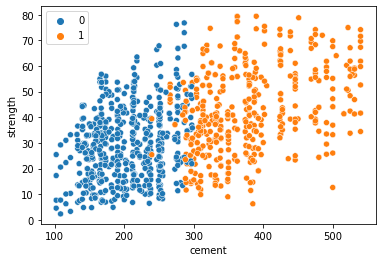

In [41]:
sns.scatterplot(x=df['cement'],y=df['strength'],hue=cluster)

In [42]:
# Function for Clustering
def clustering(x,t_col,cluster):
    column= list(set(list(x.columns))- set(df['strength'])) #here we are taking the length of unique columns and deleting the strength column (Basically all the independent features are visible)
    #print(column)
    r= int(len(column)/2) #here we are dividing the length of columns /2 and converting it into integers format
    #print(r)
    if r%2==0: #here we are saying we need it to be a even number when the output is being returned
        r=r
    else:      #if not an even number then convert it into a even number
        r=r+1
    
    
    
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    for row in range(0,r):
        for col in range(0,2):
            if a!= len(column):
                ax[row][col].scatter(x[t_col],x[column[a]],c=cluster)
                ax[row][col].set_xlabel(t_col)
                ax[row][col].set_ylabel(column[a])
                a=a+1

In [43]:
x= df.drop('strength',axis=1)

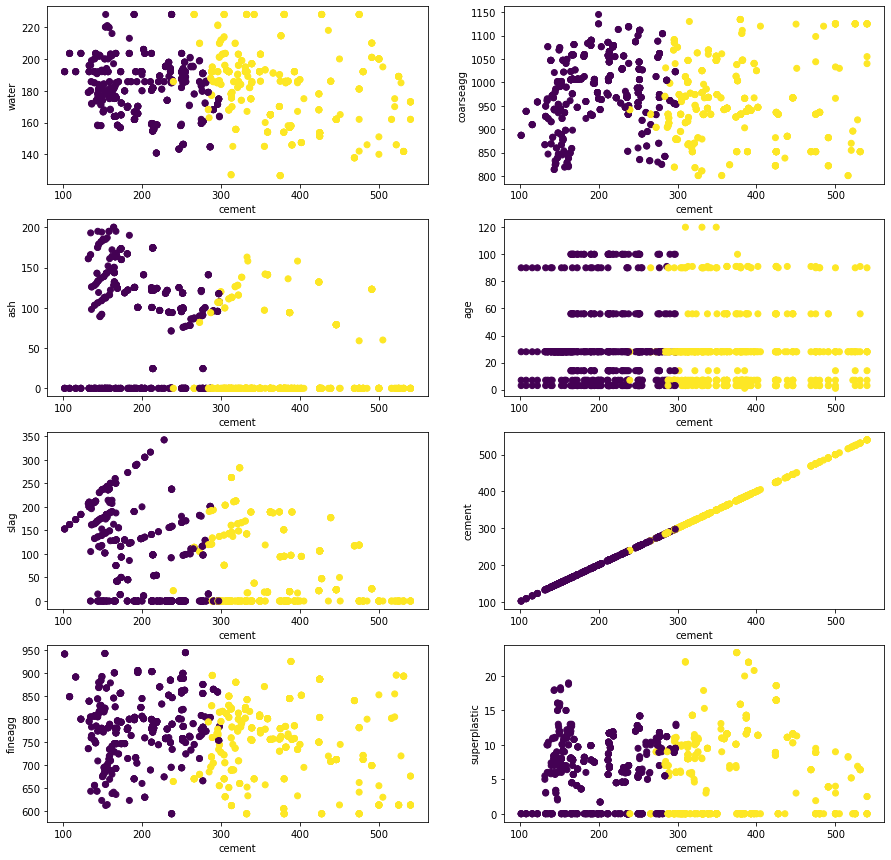

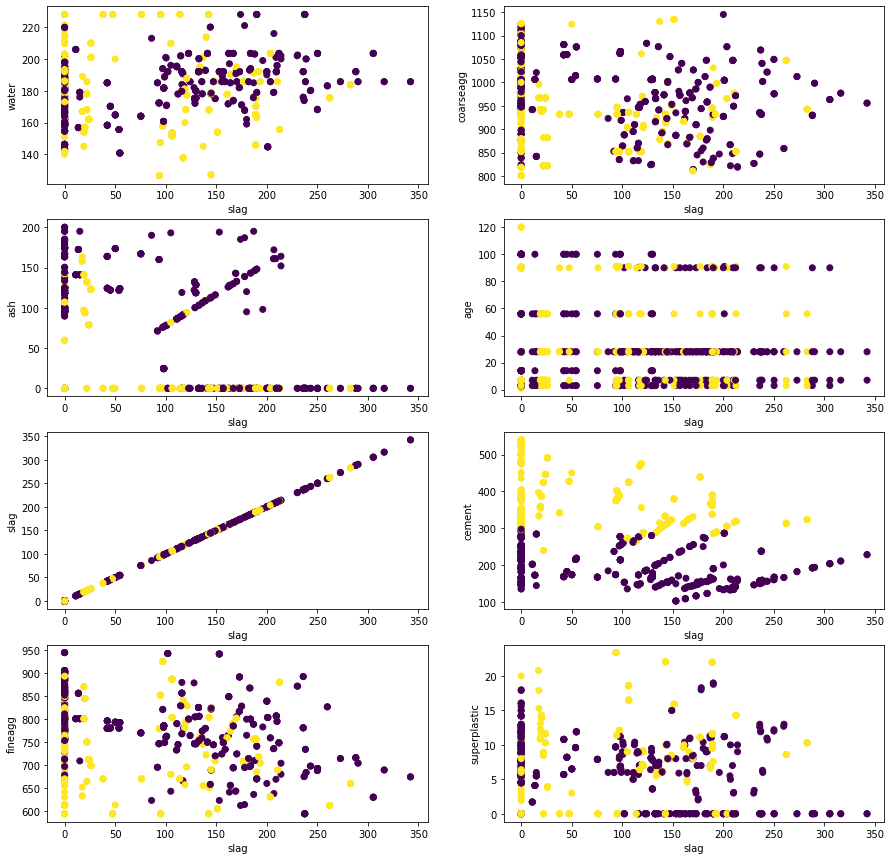

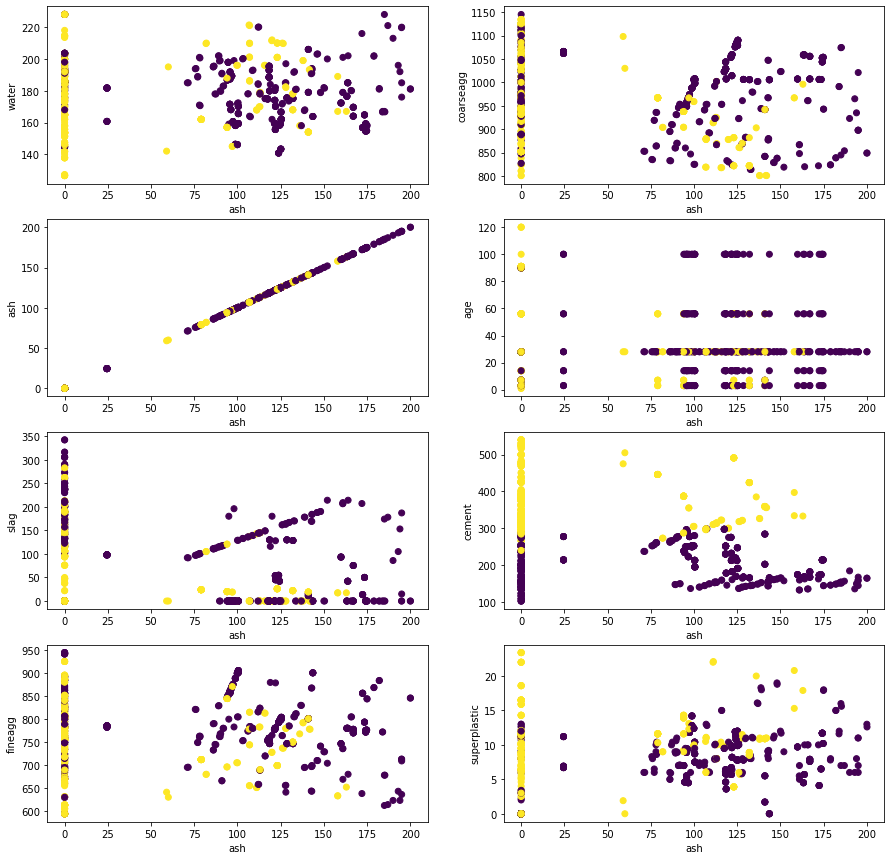

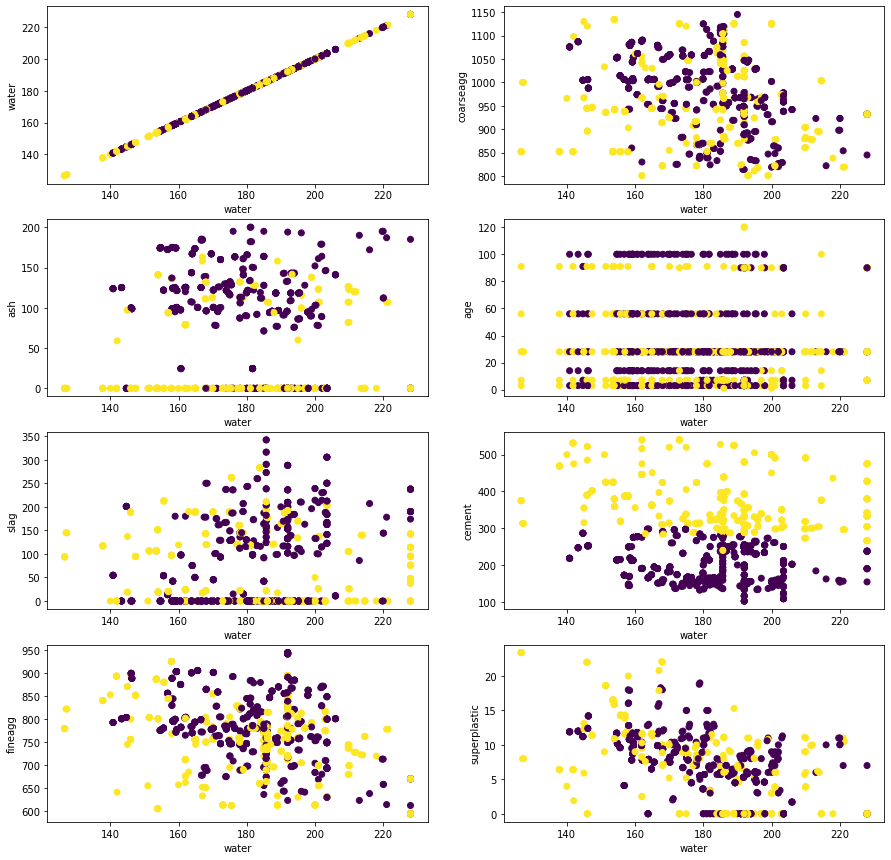

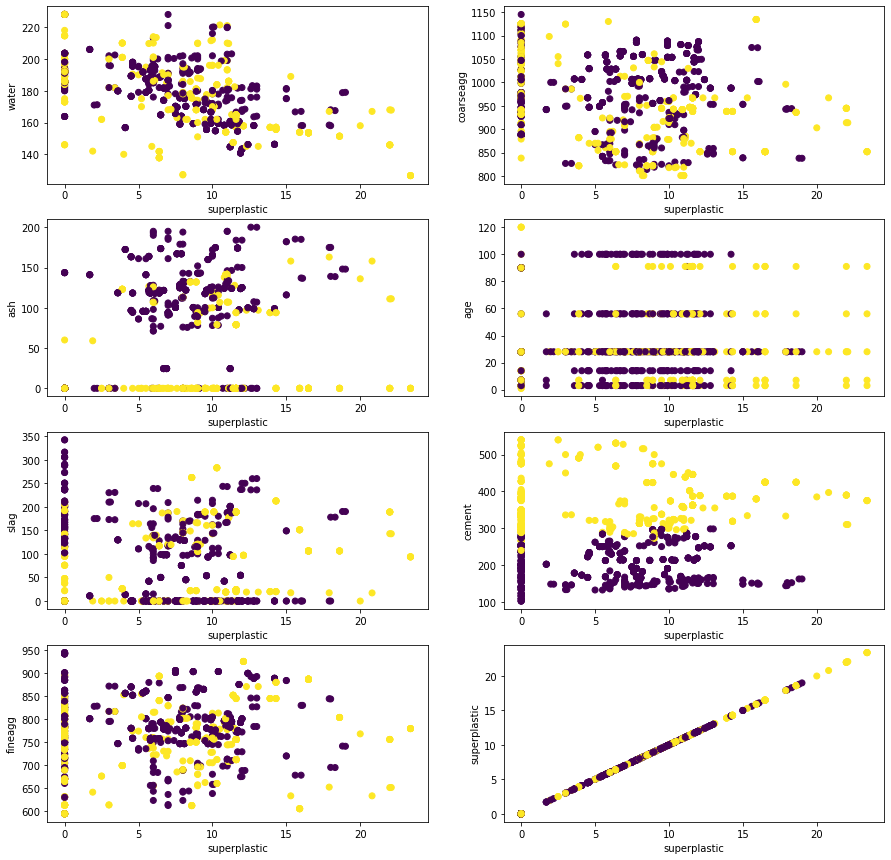

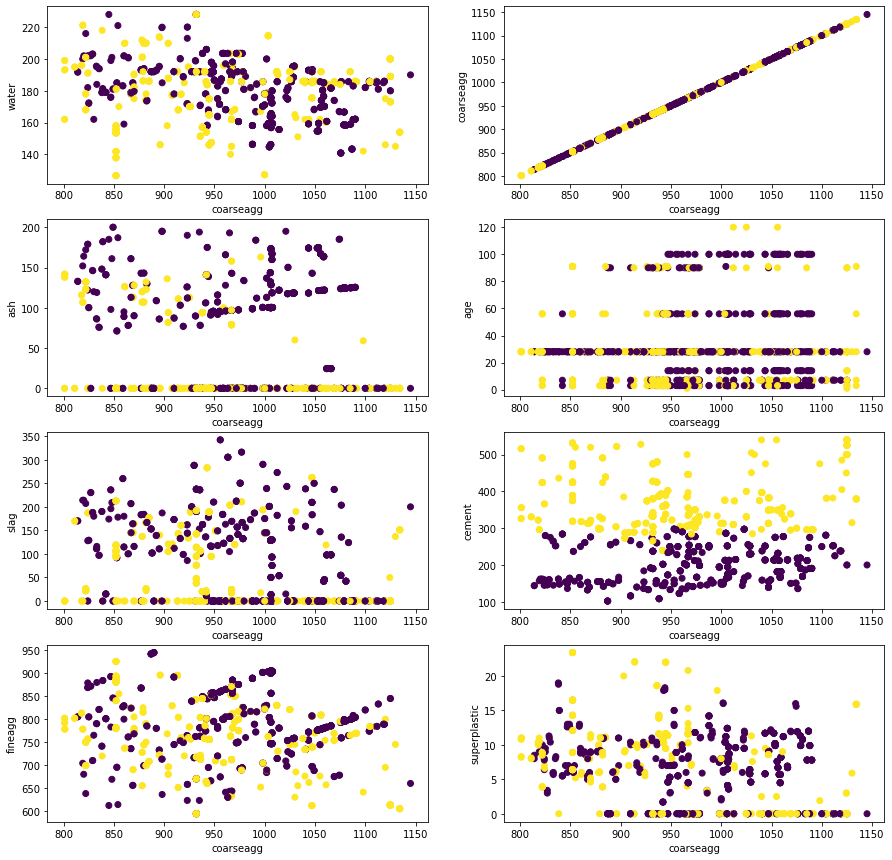

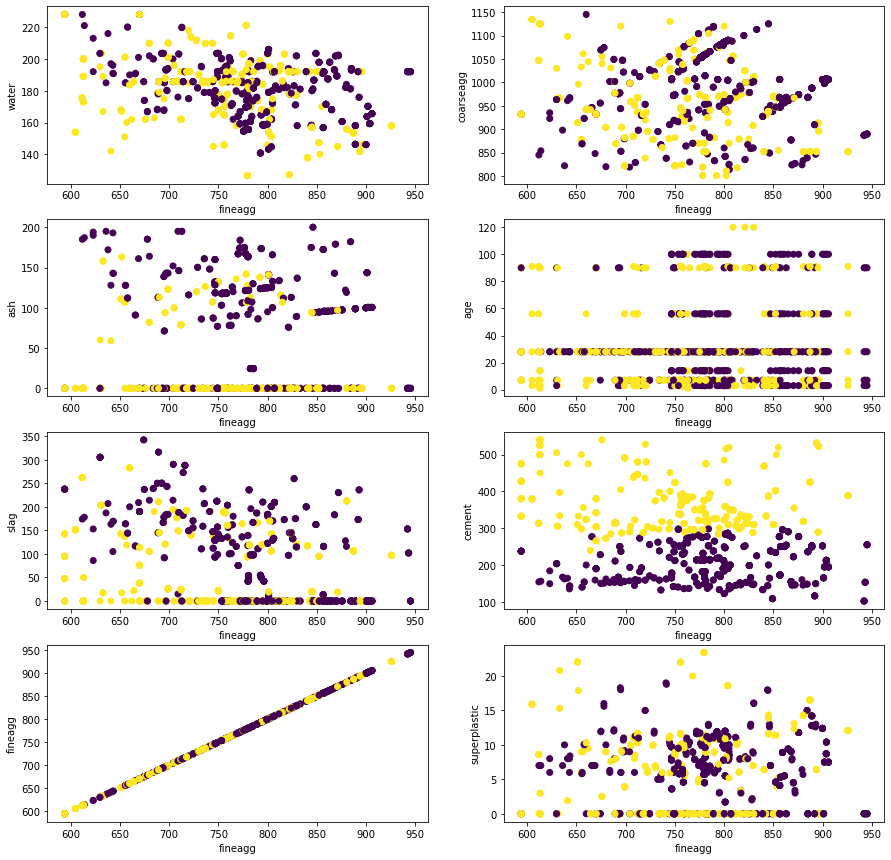

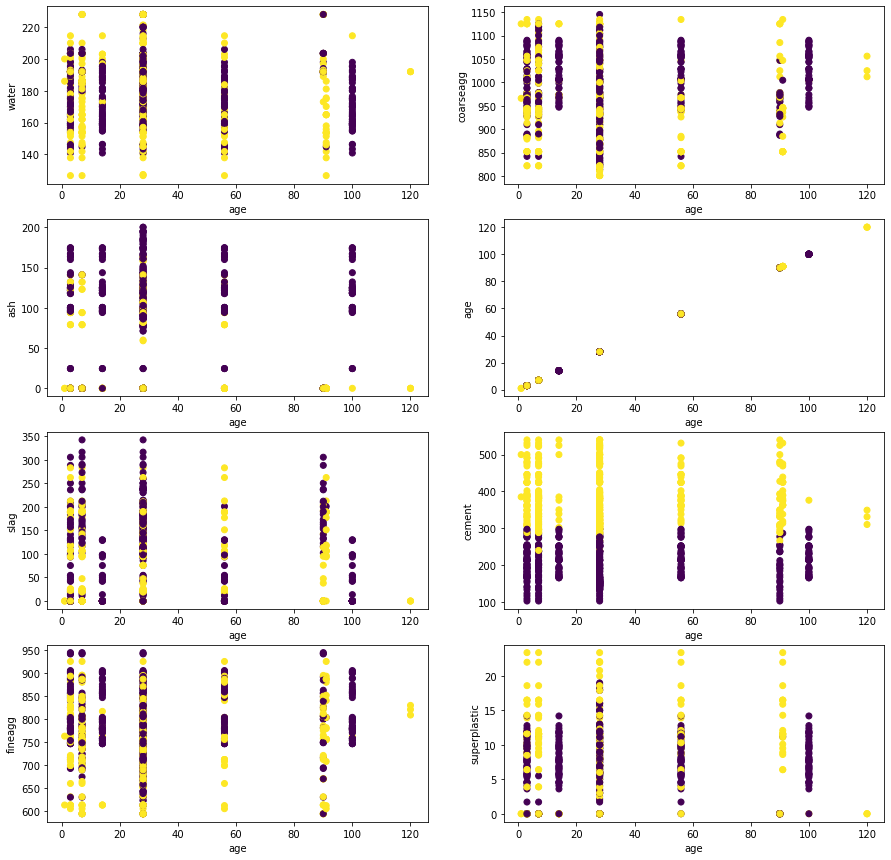

In [44]:
for col in x.columns:
    clustering(x,col,cluster)

#### Analysis

1. Cement is forming cluster with water,superplastic,fineagg,coresagg,Ash, Age

- Cement is forming clusters with almost all the features.


#### Joining labels to dataframe

In [45]:
print(cluster)

[0 0 0 ... 0 1 1]


In [46]:
new_df=df.join(pd.DataFrame(cluster,columns=['cluster']),how='left')

In [47]:
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0


In [48]:
new_f= new_df.groupby('cluster')['cement'].agg(['mean','median'])

In [49]:
#The below are the centroids

In [50]:
new_f.head()

,mean,median
cluster,,
0,203.132804,202.0
1,376.731317,362.6


In [51]:
new_df=new_df.merge(new_f,on="cluster",how='left')

In [52]:
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0,203.132804,202.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0,203.132804,202.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0,203.132804,202.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1,376.731317,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0,203.132804,202.0


In [53]:
new_df.drop('cluster',axis=1)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,mean,median
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,203.132804,202.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,203.132804,202.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,203.132804,202.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,376.731317,362.6
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,203.132804,202.0
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,203.132804,202.0
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3,41.30,376.731317,362.6
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,203.132804,202.0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28,55.06,376.731317,362.6


In [54]:
x=new_df.drop('strength',axis=1)
y=new_df['strength']

In [55]:
# Normal Model Accuracy
multiple_models(new_df,'strength')

,Model_Name,RMSC,R2_score
0,LinearRegression,8.894347,0.699204
1,SVR,14.035700,0.250949
2,Lasso,8.902736,0.698637
3,Ridge,8.894349,0.699204
4,Decision Tree,6.480010,0.840341
5,XG_boost,4.884051,0.909301
6,ADA_boost,8.523418,0.723770
7,Random_forest,5.318013,0.892467
8,Gradient_boosting,5.298367,0.893260
9,KNN_Regressor,8.961329,0.694657


In [56]:
k_fold_cv(x,y)

,model_names,score_mean,score_std
0,LinearRegression,0.686659,0.062317
1,SVR,0.238544,0.045211
2,Lasso,0.686437,0.062413
3,Ridge,0.686641,0.062314
4,DecisionTree,0.830735,0.049565
5,XGBoost,0.899436,0.046856
6,ADA,0.746286,0.041245
7,RandomForest,0.886489,0.033448
8,Gradient_boost,0.875639,0.045027
9,K_Neighbours,0.669395,0.088242


In [57]:
k_fold_cv_tune(x,y)

,model_names,score_mean,score_std
0,LinearRegression,0.686659,0.062317
1,SVR,0.238544,0.045211
2,RandomForest,0.886044,0.035821
3,DecisionTree,0.831411,0.047375
4,KNN,0.681656,0.080129
5,Lasso,0.686641,0.062319
6,Ridge,0.686641,0.062315
7,adaboost,0.738405,0.031701
8,Gboost,0.875676,0.044882
9,Xgboost,0.893114,0.040223
